Importing Dataset


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitAndVegetable/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3124 files belonging to 36 classes.


Validation Image Preprocessing

In [4]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitAndVegetable/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


Building Model

In [5]:

cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 808s 8s/step - accuracy: 0.0244 - loss: 17.0470 - val_accuracy: 0.0285 - val_loss: 3.5834
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.0337 - loss: 3.5819 - val_accuracy: 0.0313 - val_loss: 3.5832
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.0262 - loss: 3.5805 - val_accuracy: 0.0313 - val_loss: 3.5832
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.0393 - loss: 3.5775 - val_accuracy: 0.0313 - val_loss: 3.5798
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.0357 - loss: 3.5769 - val_accuracy: 0.0427 - val_loss: 3.5676
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.0387 - loss: 3.5627 - val_accuracy: 0.0598 - val_loss: 3.5574
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.0497 - loss: 3.5433 - val_accuracy: 0.0883 - val_loss: 3.5108
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.0612 - loss: 3.5064 - val_accuracy: 0.1453 - 

Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9409 - loss: 0.2769
Training accuracy: 0.948463499546051


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9279 - loss: 0.5492
Validation accuracy: 0.9173789024353027


Saving Model

In [20]:
cnn.save('trained_model.h5')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.029449423775076866,
  0.033930856734514236,
  0.029449423775076866,
  0.03457106277346611,
  0.03713188320398331,
  0.03489116579294205,
  0.05217669531702995,
  0.06658130884170532,
  0.07682458311319351,
  0.11075544357299805,
  0.12355954200029373,
  0.15460947155952454,
  0.19942381978034973,
  0.25032010674476624,
  0.29705506563186646,
  0.3562740087509155,
  0.4007682502269745,
  0.4475032091140747,
  0.48655569553375244,
  0.5124840140342712,
  0.577464759349823,
  0.6219590306282043,
  0.6488476395606995,
  0.6846991181373596,
  0.708706796169281,
  0.7272727489471436,
  0.7586427927017212,
  0.7647247314453125,
  0.8028169274330139,
  0.8005762100219727,
  0.8197823166847229,
  0.8277848958969116],
 'loss': [7.009937763214111,
  3.5820512771606445,
  3.581080675125122,
  3.5787973403930664,
  3.5757710933685303,
  3.5671298503875732,
  3.535820484161377,
  3.4837303161621094,
  3.424764633178711,
  3.3261168003082275,
  3.2334539890289307,
  3.097144842147827,

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 91.73789024353027 %


Accuracy Visualization

Training Visualization

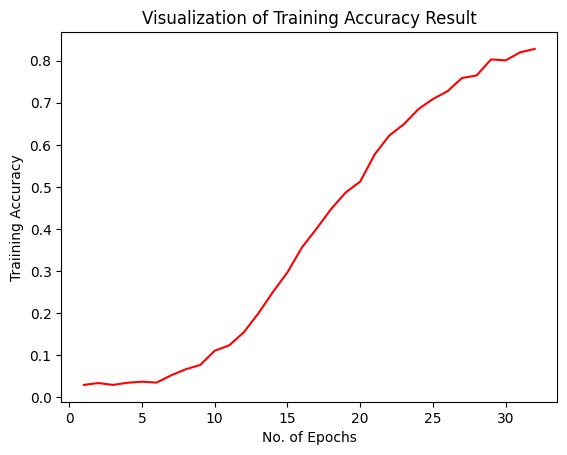

In [25]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

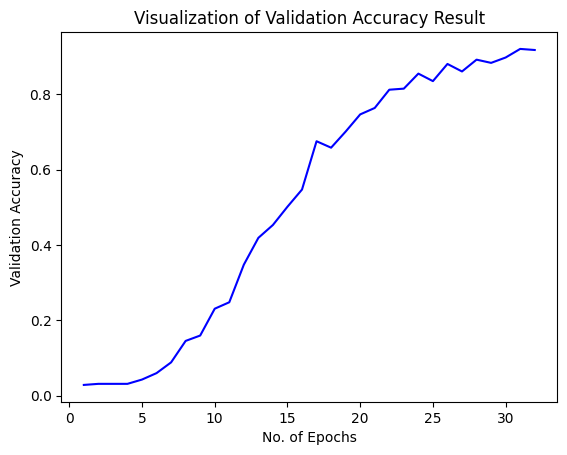

In [26]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitAndVegetable/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [28]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.9216 - loss: 0.8168
Test accuracy: 0.9192200303077698
